In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel(r'daily_offers.xlsx')
data.shape

(181673, 14)

In [3]:
data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
data.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [6]:
data.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


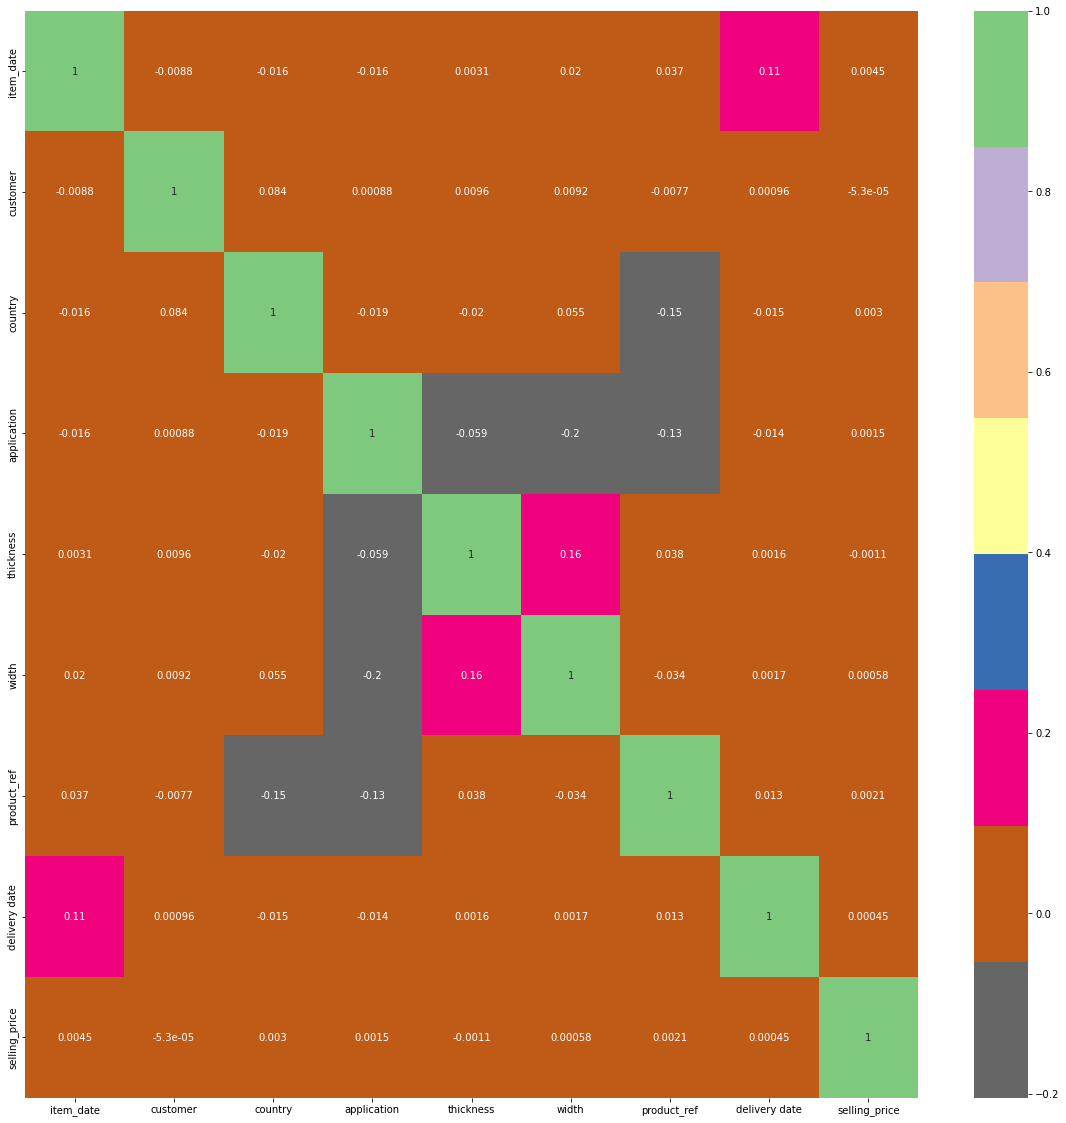

In [7]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap=plt.cm.Accent_r)
plt.show()

In [8]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

In [9]:
data.rename(columns={'item_date': 'order_date'}, inplace=True)

In [10]:
data['country'] = data['country'].astype('int')

In [11]:
data['order_date']=data['order_date'].astype('int')
data['delivery date']=data['delivery date'].astype('int')

In [12]:
data

,id,order_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401,768.024839,30202938.0,25,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401,386.127949,30153963.0,30,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401,202.411065,30349574.0,32,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401,785.526262,30211560.0,28,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702,102.482422,30200854.0,25,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702,208.086469,30200854.0,25,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702,4.235594,30200854.0,25,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702,-2000,30200854.0,25,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701,601.00


In [13]:
data.reset_index(drop=True, inplace=True)

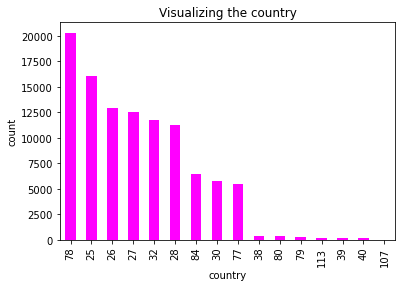

In [14]:
data['country'].value_counts().plot.bar(color = 'magenta')
plt.title('Visualizing the country count')
plt.xlabel('country')
plt.ylabel('count')
plt.show()

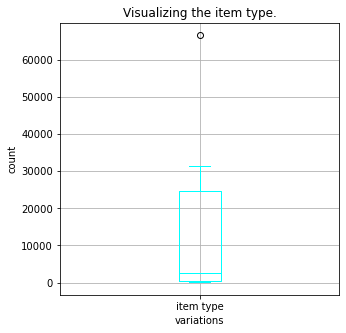

In [15]:
data['item type'].value_counts().plot.box(color = 'cyan', figsize = (5, 5))
plt.grid(True)
plt.title('Visualizing the item type.')
plt.xlabel('variations')
plt.ylabel('count')
plt.show()

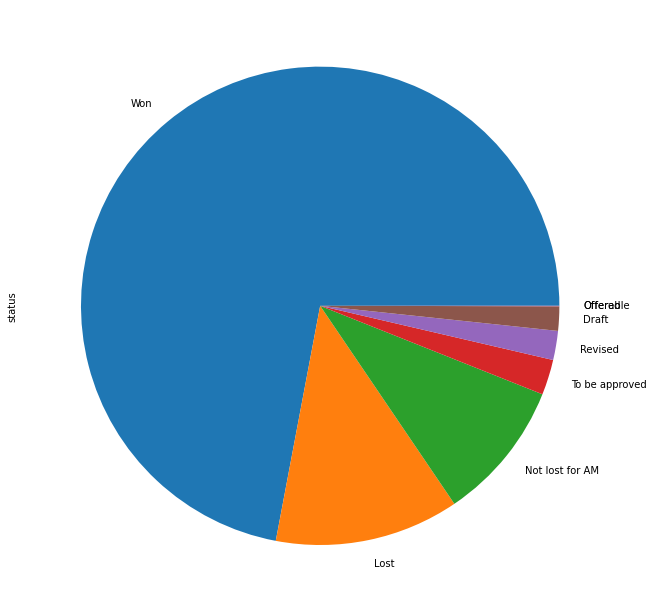

In [16]:
data['status'].value_counts().plot.pie(figsize=(11,11))
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
label_encoder = LabelEncoder()

In [19]:
data["id"] = label_encoder.fit_transform(data["id"])

In [20]:
data["material_ref"] = label_encoder.fit_transform(data["material_ref"])

In [21]:
data['quantity tons'] = label_encoder.fit_transform(data["quantity tons"])
data['status'] = label_encoder.fit_transform(data["status"])
data['item type']=label_encoder.fit_transform(data['item type'])

In [22]:
data.dtypes

id                 int32
order_date         int32
quantity tons      int32
customer         float64
country            int32
status             int32
item type          int32
application      float64
thickness        float64
width            float64
material_ref       int32
product_ref        int64
delivery date      int32
selling_price    float64
dtype: object

In [23]:
data

,id,order_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,95680,20210401,70964,30156308.0,28,7,4,10.0,2.00,1500.0,10445,1670798778,20210701,854.00
1,31789,20210401,101871,30202938.0,25,7,4,41.0,0.80,1210.0,1184,1668701718,20210401,1047.00
2,91171,20210401,99126,30153963.0,30,7,5,28.0,0.38,952.0,14749,628377,20210101,644.33
3,100849,20210401,94340,30349574.0,32,7,3,59.0,2.30,1317.0,10719,1668701718,20210101,768.00
4,31664,20210401,101912,30211560.0,28,7,4,10.0,4.00,2000.0,6976,640665,20210301,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103745,90004,20200702,84764,30200854.0,25,7,4,41.0,0.96,1220.0,2004,164141591,20200701,591.00
103746,66733,20200702,95105,30200854.0,25,7,4,41.0,0.95,1500.0,1966,164141591,20200701,589.00
103747,58871,20200702,9400,30200854.0,25,7,4,41.0,0.71,1250.0,2200,164141591,20200701,619.00
103748,49876,20200702,0,30200854.0,25,7,4,41.0,0.85,1250.0,2037,164141591,20200701,601.00


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(data.drop('selling_price', axis=1), data['selling_price'], test_size=0.1, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Elastic Net', ElasticNet())
]
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    print(f'{name}: {score:.4f}')

Linear Regression: -414.3745
Ridge Regression: -414.3654
Lasso Regression: -413.8700
Elastic Net: -197.2507


In [27]:
from sklearn.model_selection import GridSearchCV
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet()
}
params = {
    'Linear Regression': {},
    'Ridge Regression': {'alpha': [0.1, 1, 10]},
    'Lasso Regression': {'alpha': [0.1, 1, 10]},
    'Elastic Net Regression': {'alpha': [0.1, 1, 10], 'l1_ratio': [0.25, 0.5, 0.75]}
}
best_model = None
best_score = -1
for name, model in models.items():
    grid = GridSearchCV(model, params[name], cv=5)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    score = r2_score(y_test, y_pred)
    print(f"{name}: best score = {grid.best_score_:.3f}, test score = {score:.3f}, best params = {grid.best_params_}")
    if score > best_score:
        best_score = score
        best_model = grid.best_estimator_

print(f"Best model: {best_model.__class__.__name__}, test score = {best_score:.3f}")

Linear Regression: best score = -923.169, test score = -414.374, best params = {}
Ridge Regression: best score = -921.306, test score = -414.284, best params = {'alpha': 10}
Lasso Regression: best score = -892.812, test score = -409.357, best params = {'alpha': 10}
Elastic Net Regression: best score = -28.789, test score = -30.179, best params = {'alpha': 10, 'l1_ratio': 0.25}
Best model: NoneType, test score = -1.000
